In [1]:
import pybaseball as pb
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.ticker
import os
from adjustText import adjust_text

In [2]:
pitches = pb.statcast_pitcher_arsenal_stats(2025)

In [3]:
pitches = pitches[pitches['pitches']>=300]

In [4]:
pitches.sort_values('est_woba', ascending=True)

,"last_name, first_name",player_id,team_name_alt,pitch_type,pitch_name,run_value_per_100,run_value,pitches,pitch_usage,pa,ba,slg,woba,whiff_percent,k_percent,put_away,est_ba,est_slg,est_woba,hard_hit_percent
225,"Crochet, Garrett",676979,BOS,ST,Sweeper,3.3,11,332,14.0,122,0.125,0.183,0.143,38.9,49.2,29.1,0.136,0.193,0.151,25.0
486,"Cruz, Fernando",518585,NYY,FS,Split-Finger,2.2,7,317,59.3,85,0.138,0.225,0.198,60.2,56.5,37.8,0.119,0.194,0.167,37.5
475,"Helsley, Ryan",664854,NYM,SL,Slider,3.3,11,323,46.9,85,0.115,0.179,0.162,44.2,40.0,27.0,0.137,0.214,0.172,29.8
345,"Muñoz, Andrés",662253,SEA,SL,Slider,3.6,14,390,49.7,100,0.074,0.074,0.108,51.3,46.0,31.7,0.142,0.208,0.179,26.0
465,"Hader, Josh",623352,HOU,SL,Slider,2.4,8,351,41.4,86,0.160,0.259,0.204,55.2,47.7,30.6,0.147,0.214,0.180,29.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,"Buehler, Walker",621111,BOS,FC,Cutter,-1.3,-4,327,17.6,86,0.373,0.707,0.488,18.9,7.0,11.1,0.365,0.631,0.459,40.6
323,"Chivilli, Angel",683409,COL,FF,4-Seam Fastball,-3.9,-13,335,45.1,104,0.395,0.640,0.497,12.8,5.8,10.3,0.371,0.583,0.460,51.2
199,"Pfaadt, Brandon",694297,AZ,FF,4-Seam Fastball,-0.2,-1,558,26.4,127,0.274,0.460,0.354,17.5,15.0,12.8,0.350,0.705,0.466,53.7
474,"Buehler, Walker",621111,BOS,FF,4-Seam Fastball,-2.7,-12,452,24.4,85,0.329,0.686,0.466,16.3,14.1,10.7,0.321,0.682,0.467,55.9


In [5]:
top_pitches = pitches.sort_values('est_woba').head(15)

In [6]:
worst_pitches = pitches.sort_values('est_woba').tail(15)

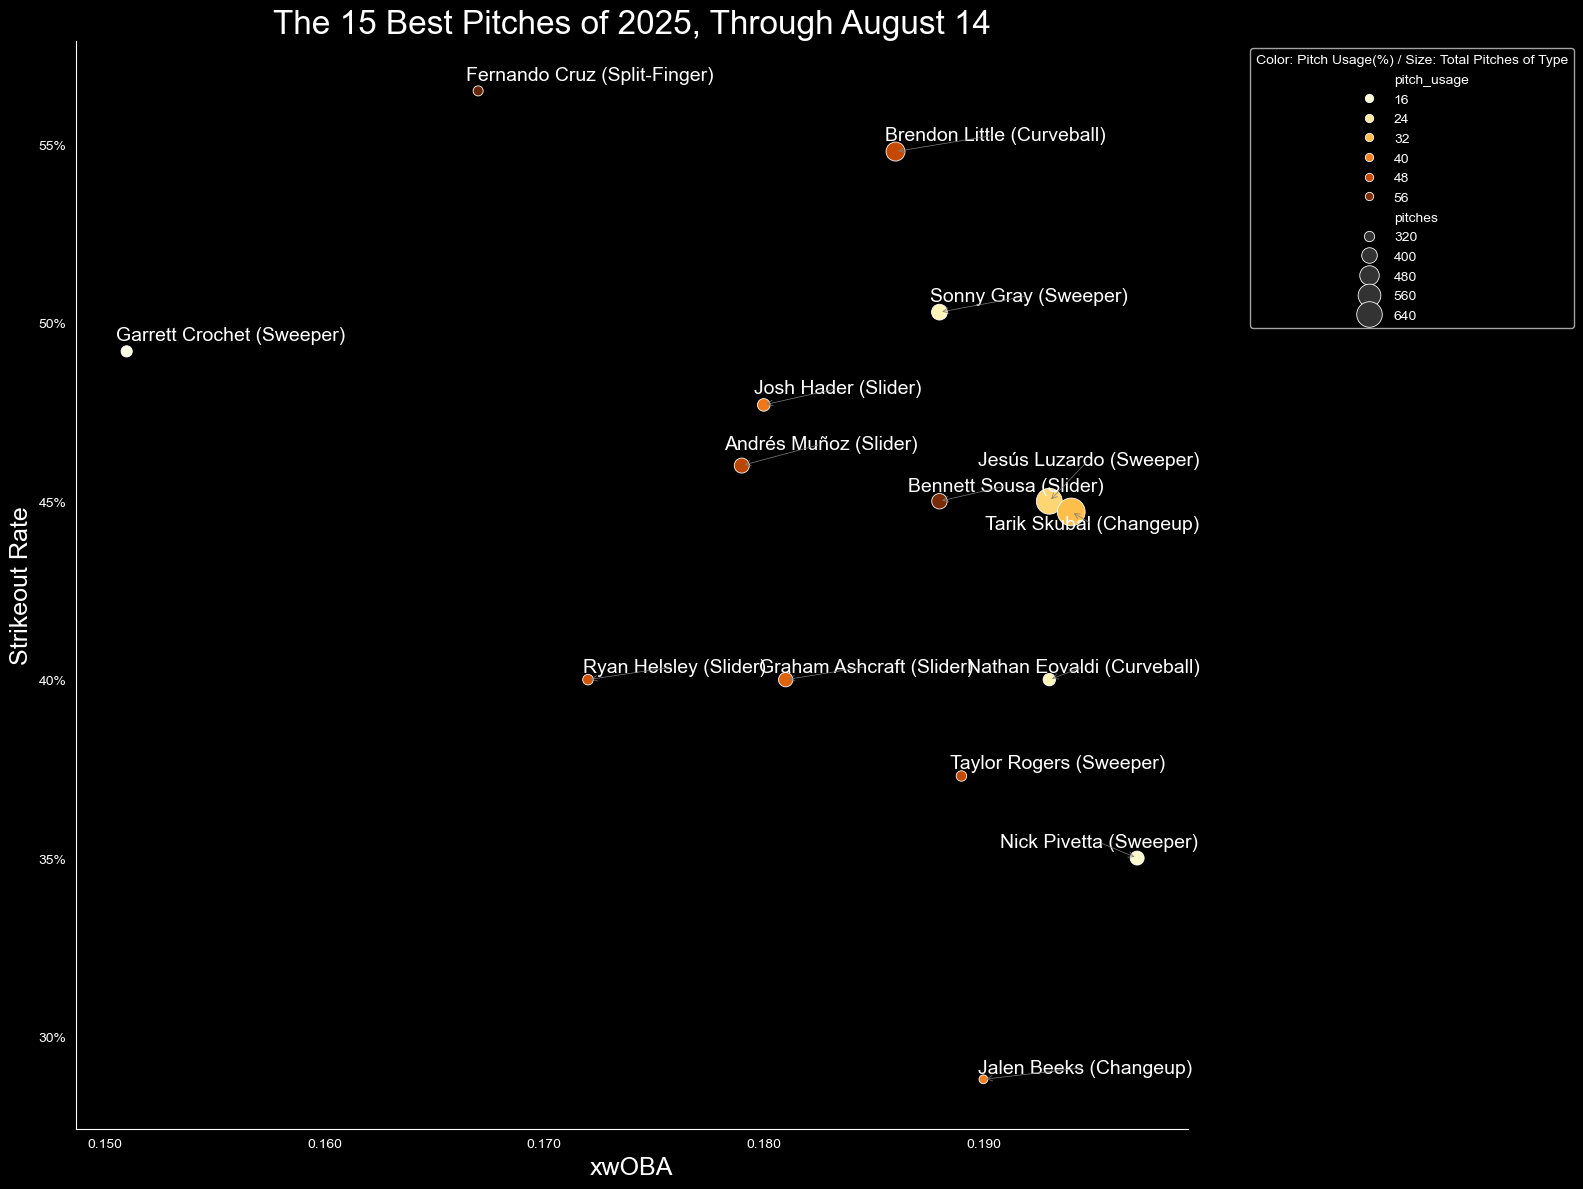

In [103]:
sns.set_style("dark", {
    'axes.facecolor': 'black',
    'figure.facecolor': 'black',
    'axes.edgecolor': 'white',
    'text.color': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'axes.labelcolor': 'white',
    'axes.titlecolor': 'white',
    'grid.color': 'gray'
})
fig, ax = plt.subplots(figsize = (16,12))
sns.despine()
sns.scatterplot(data=top_pitches, 
                x='est_woba',
                y='k_percent', 
                hue='pitch_usage',
                palette=sns.color_palette("YlOrBr", as_cmap=True),
                size='pitches',
                sizes=(40,400), 
                ax=ax)


texts = []

for i, row in top_pitches.iterrows():

    try:
        last, first = row['last_name, first_name'].split(', ')
        formatted_name = f"{first} {last}"
    except ValueError:
       
        formatted_name = row['last_name, first_name']
    

    label = f"{formatted_name} ({row['pitch_name']})"

    texts.append(
        plt.text(row['est_woba'], row['k_percent'], label,
                 ha='left', va='bottom', fontsize = 14)
    )


adjust_text(
    texts,
    ax=ax,
    arrowprops=dict(arrowstyle='->', color='gray', lw=0.5),
    expand_points=(0.08, 15),
    expand_text=(0.08, 15),
    force_text=6,
    force_points=6
)

ax.yaxis.set_major_formatter(lambda x, pos:f'{int(x)}%')
ax.xaxis.set_major_formatter(lambda x, pos:  f'{x:.3f}')

plt.xlabel("xwOBA", fontsize = 18)
plt.ylabel("Strikeout Rate", fontsize = 18)
plt.title("The 15 Best Pitches of 2025, Through August 14", fontsize = 24)

handles, labels = ax.get_legend_handles_labels()
labels[1] = 'Pitch Usage (%)'
labels[8] = 'Pitches of Type'
ax.legend(handles=handles, title="Color: Pitch Usage(%) / Size: Total Pitches of Type", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [111]:
fig.clf()
ax.cla()

In [110]:
plt.close(fig)

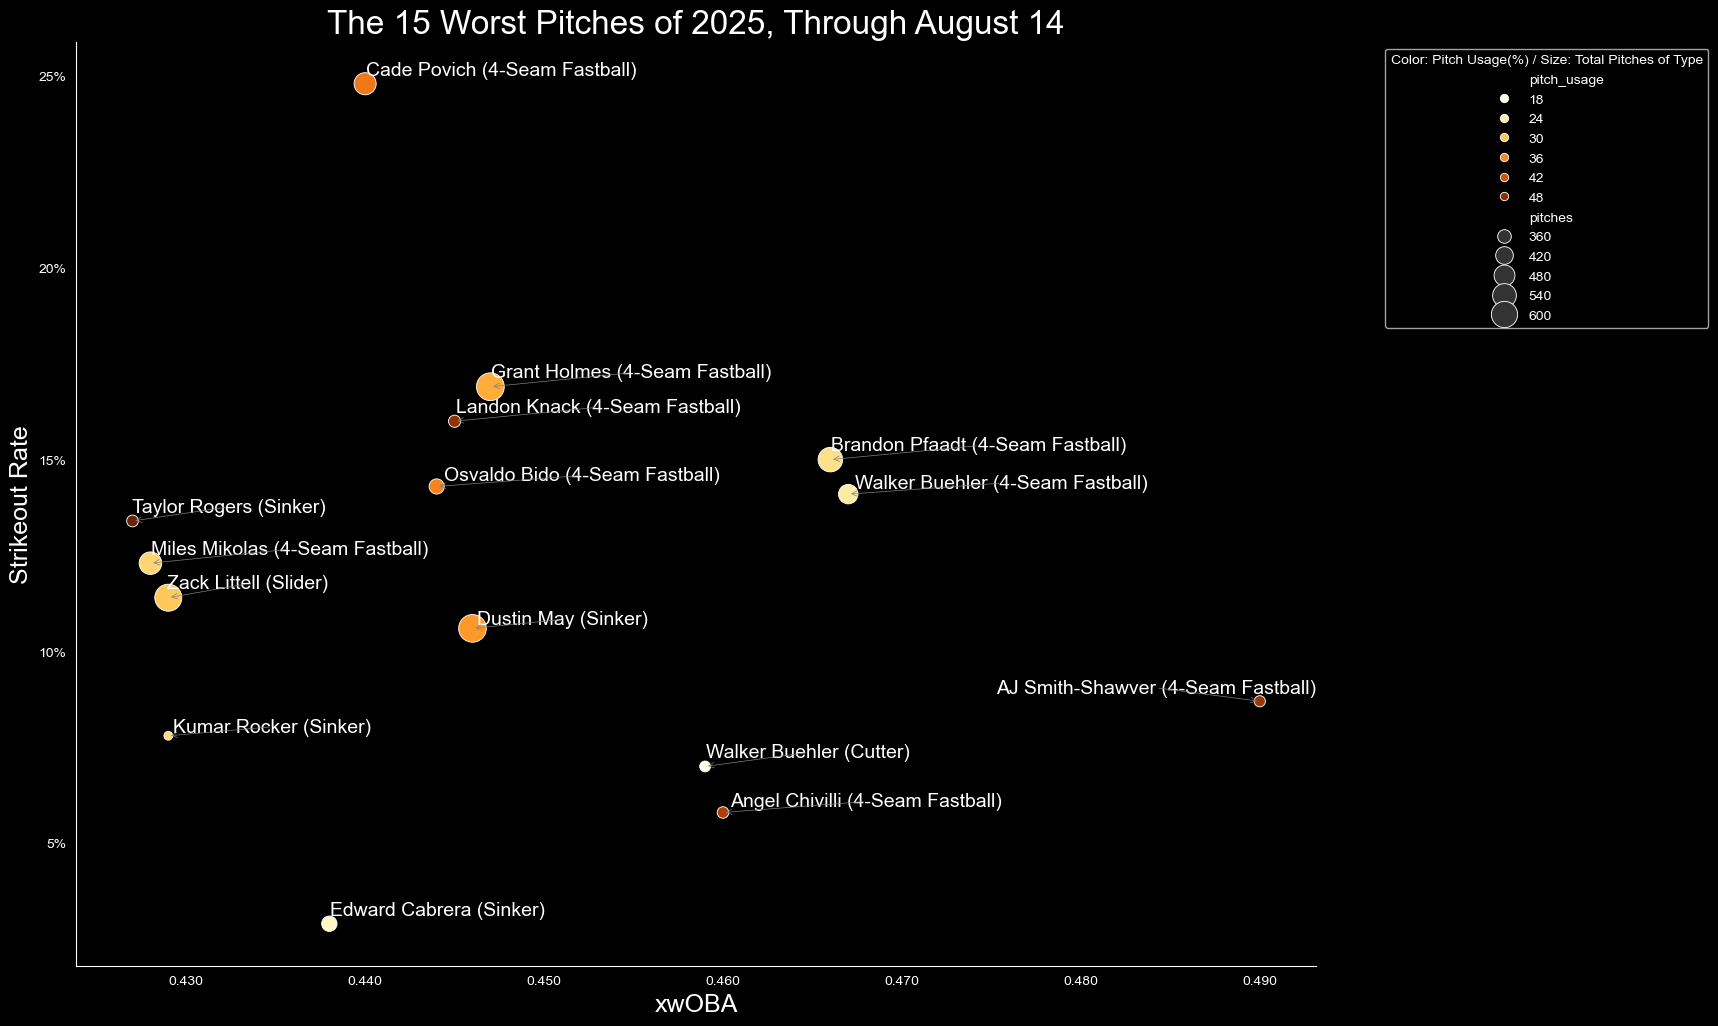

In [10]:
sns.set_style("dark", {
    'axes.facecolor': 'black',
    'figure.facecolor': 'black',
    'axes.edgecolor': 'white',
    'text.color': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'axes.labelcolor': 'white',
    'axes.titlecolor': 'white',
    'grid.color': 'gray'
})
fig, ax = plt.subplots(figsize = (16,12))
sns.despine()
sns.scatterplot(data=worst_pitches, 
                x='est_woba',
                y='k_percent', 
                hue='pitch_usage',
                palette=sns.color_palette("YlOrBr", as_cmap=True),
                size='pitches',
                sizes=(40,400), 
                ax=ax)


texts = []

for i, row in worst_pitches.iterrows():

    try:
        last, first = row['last_name, first_name'].split(', ')
        formatted_name = f"{first} {last}"
    except ValueError:
       
        formatted_name = row['last_name, first_name']
    

    label = f"{formatted_name} ({row['pitch_name']})"

    texts.append(
        plt.text(row['est_woba'], row['k_percent'], label,
                 ha='left', va='bottom', fontsize = 14)
    )


adjust_text(
    texts,
    ax=ax,
    arrowprops=dict(arrowstyle='->', color='gray', lw=0.5),
    expand_points=(0.08, 15),
    expand_text=(0.08, 15),
    force_text=6,
    force_points=6
)

ax.yaxis.set_major_formatter(lambda x, pos:f'{int(x)}%')
ax.xaxis.set_major_formatter(lambda x, pos:  f'{x:.3f}')

plt.xlabel("xwOBA", fontsize = 18)
plt.ylabel("Strikeout Rate", fontsize = 18)
plt.title("The 15 Worst Pitches of 2025, Through August 14", fontsize = 24)

handles, labels = ax.get_legend_handles_labels()
labels[1] = 'Pitch Usage (%)'
labels[8] = 'Pitches of Type'
ax.legend(handles=handles, title="Color: Pitch Usage(%) / Size: Total Pitches of Type", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout
plt.show()